In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder ,StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import customtkinter


In [3]:
df = pd.read_csv('Dataset/Life Expectancy Data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
missing_life_expectancy = df[df['Life expectancy '].isna()]
print("missing life_expectancy (sum) : " + str(len(missing_life_expectancy)))
print(missing_life_expectancy['Country'])

missing life_expectancy (sum) : 10
624              Cook Islands
769                  Dominica
1650         Marshall Islands
1715                   Monaco
1812                    Nauru
1909                     Niue
1958                    Palau
2167    Saint Kitts and Nevis
2216               San Marino
2713                   Tuvalu
Name: Country, dtype: object


In [7]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [8]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
# The dataset also contains several numerical columns:

# Year: the year that the data was observed
# Life expectancy: the number of years that an average person can be expected to live
# Adult Mortality: this is the probability that a person aged 15 years old will die before they reach the age of 60 (in a population per 1000 people)
# Infant deaths: the number of infant deaths (in a population per 1000 people)
# Alcohol: pure alcohol consumption per capita of persons aged over 15 in Litres
# percentage expenditure: the percentage of a country's GDP per capita expended on healthcare
# Hepatitis B: the percentage of Hepatitis B immunization among children aged 1 year old
# Measles: the number of Measles cases reported (in a population per 1000 people)
# BMI: the average body mass index value of the country's population
# under-five deaths: the number of deaths (in a population per 1000 people) of children under 5 years of age
# Polio: the percentage of Polio immunization among children aged 1 year old
# Total expenditure: the percentage of total government expenditure allocated to general healthcare expenditure.
# Diphtheria: the percentage of Diphtheria, Tetanus, Toxoid, Prtussis (DTP3) immunization among children aged 1 year old
# HIV/AIDS: the number of HIV/AIDS deaths (per 1000 live births) of children under 4 years of age.
# GDP: the Gross Domestic Product value per capita calculated in USD
# Population: the country's population
# thinness 1-19 years: the percentage thinness of children aged between 1 and 19 years
# thinness 5-9 years: the percentage thinness of children aged between 5 and 9 years
# Income composition of resources: the Human Development Index value (0-1) in reference to a country's configuration of resources
# Schooling: the mean number of years of schooling

In [10]:
country_sum = df['Country'].value_counts()
#avg_M_alcohol = df.groupby('Country')['Alcohol'].mean().get('Montenegro')
df['Status'] = df['Status'].apply(lambda x: 1 if 'Developing' in x else 0)


def fill_missing_with_mean(df, column):
    df[column].fillna(value=np.mean(df[column]), inplace=True)

columns_to_fill = ['Life expectancy ', 'Adult Mortality', 'Alcohol', 'Hepatitis B', 
                    ' BMI ', 'Polio', 'Total expenditure', 'Diphtheria ', 'GDP', 
                    'Population', ' thinness  1-19 years', ' thinness 5-9 years', 
                    'Income composition of resources', 'Schooling']

for column in columns_to_fill:
    fill_missing_with_mean(df, column)



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11088\2884955198.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(value=np.mean(df[column]), inplace=True)


feature extraction :

In [11]:
df['Alcohol_affect_Mortality'] = df['Adult Mortality'] * df['Alcohol']

In [12]:
df['Vaccine_Coverage_Score']  = (df['Hepatitis B']+df['Polio']+df['Diphtheria '])/3 # average

In [13]:
df['Child Mortality Index'] = df['infant deaths'] + df['under-five deaths ']
# df=df.drop(columns=['under-five deaths ', 'infant deaths'])


In [14]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Alcohol_affect_Mortality           0
Vaccine_Coverage_Score             0
Child Mortality Index              0
dtype: int64

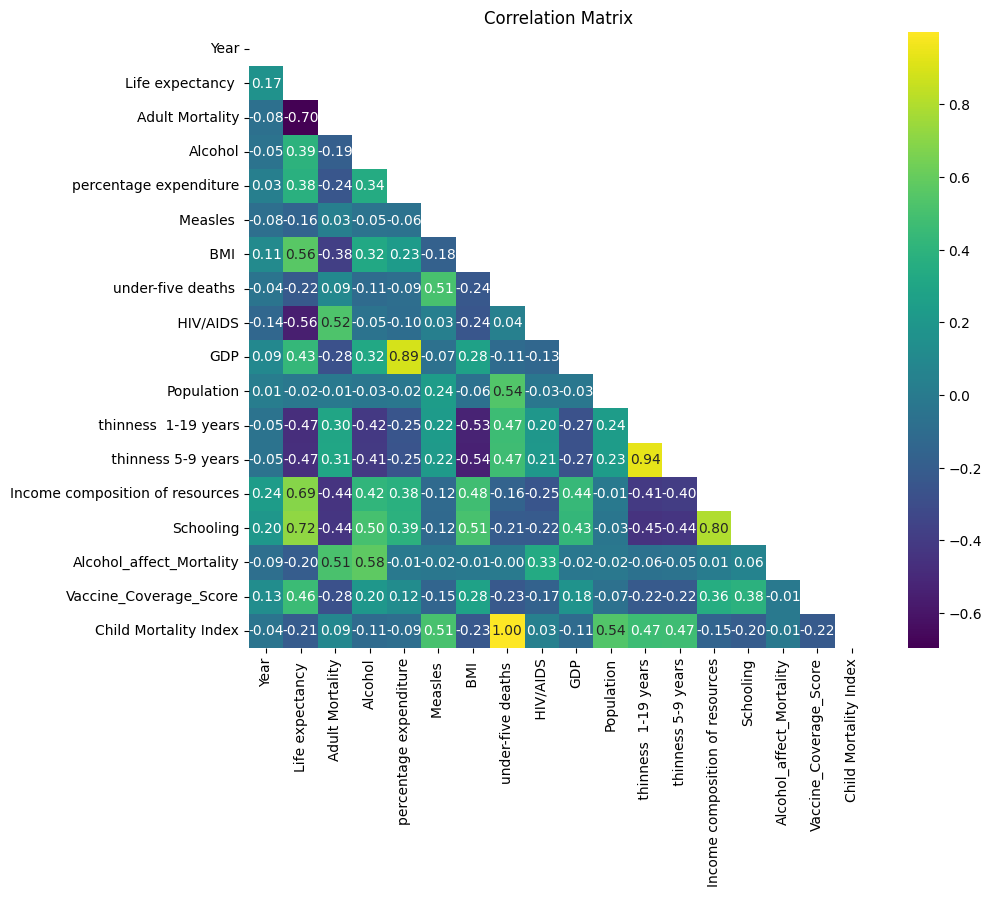

In [15]:


# Drop columns you don't want to include in the correlation matrix
f = df.drop(columns=['Country', 'Status', 'Total expenditure', 'infant deaths', 'Hepatitis B', 'Polio', 'Diphtheria '], axis=1)

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(f.corr(), dtype=bool))

# Plot heatmap with correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(f.corr(), cmap='viridis', annot=True, fmt=".2f", mask=mask)  # fmt=".2f" to display correlation values with 2 decimal places
plt.title('Correlation Matrix')
plt.show()


In [16]:
f.corr()

,Year,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Alcohol_affect_Mortality,Vaccine_Coverage_Score,Child Mortality Index
Year,1.000000,0.169623,-0.078861,-0.048168,0.031400,-0.082493,0.108327,-0.042937,-0.139741,0.093351,0.014951,-0.047592,-0.050627,0.236333,0.203471,-0.085713,0.127930,-0.040631
Life expectancy,0.169623,1.000000,-0.696359,0.391598,0.381791,-0.157574,0.559255,-0.222503,-0.556457,0.430493,-0.019638,-0.472162,-0.466629,0.692483,0.715066,-0.201144,0.461801,-0.211677
Adult Mortality,-0.078861,-0.696359,1.000000,-0.190408,-0.242814,0.031174,-0.381449,0.094135,0.523727,-0.277053,-0.012501,0.299863,0.305366,-0.440062,-0.435108,0.510778,-0.276738,0.087689
Alcohol,-0.048168,0.391598,-0.190408,1.000000,0.339634,-0.051055,0.318070,-0.110777,-0.048650,0.318591,-0.030765,-0.416946,-0.405881,0.416099,0.497546,0.581127,0.204423,-0.112155
percentage expenditure,0.031400,0.381791,-0.242814,0.339634,1.000000,-0.056596,0.228537,-0.087852,-0.097857,0.888140,-0.024648,-0.251190,-0.252725,0.380374,0.388105,-0.010157,0.123088,-0.086975
Measles,-0.082493,-0.157574,0.031174,-0.051055,-0.056596,1.000000,-0.175925,0.507809,0.030899,-0.068060,0.236250,0.224742,0.221007,-0.115764,-0.122609,-0.024724,-0.148721,0.505395
BMI,0.108327,0.559255,-0.381449,0.318070,0.228537,-0.175925,1.000000,-0.237586,-0.243548,0.276645,-0.063238,-0.532025,-0.538911,0.479837,0.508105,-0.008973,0.282436,-0.233387
under-five deaths,-0.042937,-0.222503,0.094135,-0.110777,-0.087852,0.507809,-0.237586,1.000000,0.038062,-0.110640,0.535864,0.467626,0.472099,-0.161533,-0.207111,-0.004918,-0.228941,0.999395
HIV/AIDS,-0.139741,-0.556457,0.523727,-0.048650,-0.097857,0.030899,-0.243548,0.038062,1.000000,-0.134514,-0.027318,0.203922,0.207140,-0.247454,-0.218620,0.332525,-0.172315,0.032653
GDP,0.093351,0.430493,-0.277053,0.318591,0.888140,-0.068060,0.276645,-0.110640,-0.134514,1.000000,-0.025612,-0.267745,-0.272400,0.440317,0.429489,-0.022241,0.177965,-0.109234


In [17]:
# missing_life_expectancy = df[df['Schooling'].isna()]
# print("missing Alcohol (sum) : " + str(len(missing_life_expectancy)))
# print((missing_life_expectancy['Country'].value_counts()))

In [18]:
# one_hot_encoded_countries = pd.get_dummies(df['Country'], prefix='Country')

# df = pd.concat([df, one_hot_encoded_countries], axis=1)
# #'Country','Status','Total expenditure','infant deaths',' thinness  1-19 years', ' thinness 5-9 years',' BMI '
# df= df.drop(['Country','Status','Total expenditure','infant deaths',],axis=1)

In [19]:
# Perform one-hot encoding on the 'Country' column
one_hot_encoded_countries = pd.get_dummies(df['Country'], prefix='Country')

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded_countries], axis=1)

# Drop specified columns from the DataFrame
columns_to_drop = ['Country', 'Status', 'Total expenditure', 'infant deaths', ' thinness  1-19 years', ' thinness 5-9 years', ' BMI ']
df.drop(columns=columns_to_drop, inplace=True)

In [20]:
X=df.drop(columns='Life expectancy ')
y=df['Life expectancy ']

In [21]:
standardized_data = StandardScaler().fit_transform(X)
X = standardized_data

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
m = SVR()


In [23]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'C': [0.1, 1, 10, 100],
#               'gamma': [1, 0.1, 0.01, 0.001],
#               'kernel': ['linear', 'rbf']}
# grid_search = GridSearchCV(m, param_grid, cv=5, n_jobs=-1)

In [24]:
# grid_search.fit(x_train,y_train)
# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)
# # Predict on the test data
# Y_pred = grid_search.predict(x_train)

# print("Train Accuracy: ", grid_search.score(x_train, y_train))
# Y_pred = grid_search.predict(x_test)
# print("Test Accuracy: ", grid_search.score(x_test, y_test))

In [25]:
m.fit(x_train,y_train)
y_pred=m.predict(x_test)
m.score(x_test,y_test)

0.9207877533545006

In [26]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 6.862574922591116
Mean Absolute Error: 1.6370810421803836
R-squared: 0.9207877533545006


In [27]:
# Cross-validation
cv_scores = cross_val_score(m, x_train, y_train, cv=5, scoring='r2').mean()
print("Cross-Validation R-squared Scores:", cv_scores)

Cross-Validation R-squared Scores: 0.8699520754985995


In [28]:
# Additional models for comparison
linear_model = LinearRegression()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()

In [29]:
models = [linear_model, rf_model, gb_model]
models.append(m)
# Model comparison
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    print("\n", type(model).__name__, "Model Evaluation:")
    print("R-squared:", r2)




 LinearRegression Model Evaluation:
R-squared: -8.21580340809086e+23

 RandomForestRegressor Model Evaluation:
R-squared: 0.9667558880388963

 GradientBoostingRegressor Model Evaluation:
R-squared: 0.9466423384456539

 SVR Model Evaluation:
R-squared: 0.9207877533545006


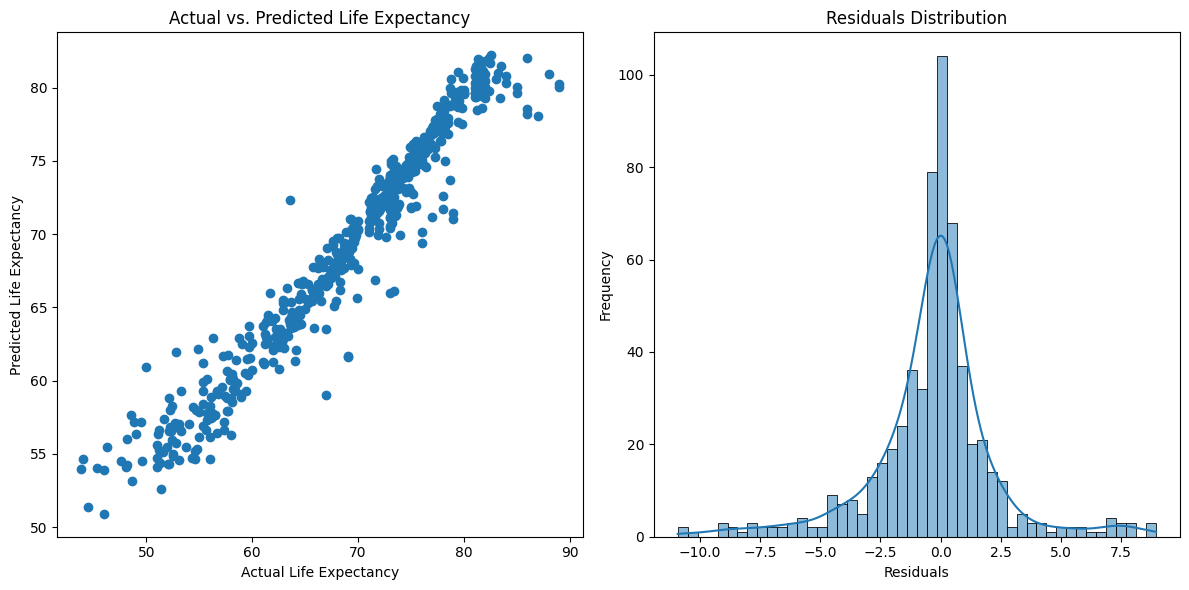

In [30]:
# Visualizations
plt.figure(figsize=(12, 6))
# Scatter plot of actual vs. predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs. Predicted Life Expectancy")
# Residual plot
plt.subplot(1, 2, 2)

residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.tight_layout()
plt.show()

In [31]:
data=pd.read_csv("Dataset/Life Expectancy Data.csv")
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [33]:
data_column=data.columns
data_column=data_column.delete(3)
data_column[10:21]

Index(['under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [34]:
app=customtkinter.CTk()
app.geometry("750x580")

def makePrediction():
    for k in range(len(entry_variables1)):
        entry_variables1[k].set(entries1[k].get())

    for k in range(len(entry_variables2)):
        entry_variables2[k].set(entries2[k].get())

    test_list=[]
    for i in entry_variables1:
        test_list.append(i.get())
    for j in entry_variables2:
        test_list.append(j.get())

    number_feature_idx=[1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

    

    for feature in range(len(test_list)):
        if feature in number_feature_idx:
            test_list[feature]=float(test_list[feature])

    
    test_list.append(test_list[3]*test_list[5])
    test_list.append((test_list[7]+test_list[11]+test_list[13])/3)
    test_list.append(test_list[4]+test_list[10])

    one_hot_encoded_countries = pd.get_dummies(data['Country'],dtype="int").columns


    for i in range(len(one_hot_encoded_countries)):
        if one_hot_encoded_countries[i]==test_list[0]:
            test_list.append(1)
        else:
            test_list.append(0)
            
    teat_list_removed=[test_list[x] for x in range(len(test_list)) if x not in [0,2,12,4,9,17,18]]

    x_test=np.array(teat_list_removed)



    x_test = x_test.reshape(1, -1)

    predection=m.predict(x_test)

    toplevel_window=customtkinter.CTkToplevel()

    toplevel_label=customtkinter.CTkLabel(toplevel_window,text=f"Expexted output  {predection}  واعلم الله")
    toplevel_label.grid(row=0,column=0,padx=30,pady=30)
            
    

    

        
entry_variables1=[None]*10
entry_variables2=[None]*11
entries1=[]
entries2=[]

for i,value in enumerate(data_column[0:10]):
    label=customtkinter.CTkLabel(app,text=value)
    label.grid(row=i,column=0,padx=10,pady=10)

    entry_variables1[i]=customtkinter.StringVar()
    entry=customtkinter.CTkEntry(app,textvariable=entry_variables1[i])
    entry.grid(row=i,column=1,padx=10,pady=10)
    entries1.append(entry)

for i,value in enumerate(data_column[10:21]):
    label=customtkinter.CTkLabel(app,text=value)
    label.grid(row=i,column=2,padx=10,pady=10)

    entry_variables2[i]=customtkinter.StringVar()
    entry=customtkinter.CTkEntry(app,textvariable=entry_variables2[i])
    entry.grid(row=i,column=3,padx=10,pady=10)
    entries2.append(entry)

predict_button=customtkinter.CTkButton(app,text="Predict",command=makePrediction)
predict_button.grid(row=11,column=2,padx=(0,80),pady=10)

app.mainloop()

In [35]:
x_train.shape

(2350, 210)

In [36]:
df.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ',
       'under-five deaths ', 'Polio', 'Diphtheria ',
       ...
       'Country_United Republic of Tanzania',
       'Country_United States of America', 'Country_Uruguay',
       'Country_Uzbekistan', 'Country_Vanuatu',
       'Country_Venezuela (Bolivarian Republic of)', 'Country_Viet Nam',
       'Country_Yemen', 'Country_Zambia', 'Country_Zimbabwe'],
      dtype='object', length=211)

In [37]:
df['Alcohol_affect_Mortality'] = df['Adult Mortality'] * df['Alcohol']
df['Vaccine_Coverage_Score']  = (df['Hepatitis B']+df['Polio']+df['Diphtheria '])/3 # average
df['Child Mortality Index'] = df['infant deaths'] + df['under-five deaths ']

KeyError: 'infant deaths'

In [ ]:
one_hot_encoded_countries = pd.get_dummies(data['Country'],dtype="int")
print(one_hot_encoded_countries.columns)